# stop-to-stop segments

In [1]:
import dask_geopandas as dg
import dask.dataframe as dd
import geopandas as gpd
import pandas as pd
import shapely

from update_vars import SEGMENT_GCS, COMPILED_CACHED_VIEWS, analysis_date

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [37]:
#test_shape = "b315bbbd7eff442b38f52615fde4a2d2"
df = gpd.read_parquet(
    f"./data/stops_projected.parquet", 
    #filters = [[("shape_array_key", "==", test_shape)]]
)

In [53]:
test = df.head(100)

In [62]:
segment_endpoint_x = np.array(test.stop_interpolated.x)
segment_endpoint_y = np.array(test.stop_interpolated.y)

In [65]:
#for x, y in zip(segment_endpoint_x, segment_endpoint_y):


In [8]:
break_dist = df.shape_meters.iloc[0].tolist()
test_geom = df.shape_geometry.iloc[0]

In [11]:
import shapely
import numpy as np

In [80]:
test_geom.coords[0]

(-131169.64161250877, 73212.3800774184)

In [29]:
shape_path_dist = np.array([test_geom.project(shapely.geometry.Point(p)) 
                   for p in test_geom.coords])

In [30]:
shape_path_dist[:5]

array([  0.        ,  30.07007915,  72.12851382,  98.20208521,
       101.03665904])

In [31]:
first_cut = break_dist[0]

In [32]:
type(shape_path_dist)

numpy.ndarray

In [71]:
subset = np.where(shape_path_dist <= first_cut)[0]

In [86]:
last_point = segment_endpoint_x[0], segment_endpoint_y[0]


In [83]:
shape_path_dist[subset] 

array([ 0.        , 30.07007915])

In [88]:

segmented_line = [test_geom.coords[0], test_geom.coords[1], last_point ]

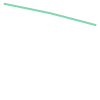

In [92]:
shapely.geometry.LineString(segmented_line)

In [ ]:
# Find the endpoint of that segment
# but also keep all the other shapely objects in between
# otherwise we lose the curves


In [10]:
for i, dist in enumerate(break_dist[:2]):
    # First segment, there's no previous element to take difference against
    if i == 0:
        return test_geom.coords[0]
    # subsequent segment, look for previous breaking distance to continue
    elif i > 0:

0 59.68769037507417
1 1031.7252200790044


In [ ]:
from shapely.geometry import Point, LineString

def cut(line, distance):
    if distance <= 0.0 :#line.length:
        return [None, LineString(line)]
    elif distance >= 1.0:
        return [LineString(line), None]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p), normalized=True)
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance, normalized=True)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]
        
        
def cut_piece(line,distance1, distance2):
    """ From a linestring, this cuts a piece of length lgth at distance.
    Needs cut(line,distance) func from above ;-) 
    """
    l1 = cut(line, distance1)[1]
    l2 = cut(line, distance2)[0]
    result = l1.intersection(l2)
    return result

In [ ]:
test = dg.read_parquet(
    f"{SEGMENT_GCS}test_stop_segments_{analysis_date}"
).compute()

In [ ]:
test_shape = "b315bbbd7eff442b38f52615fde4a2d2"
stops = gpd.read_parquet(f"./data/stops_projected.parquet", 
                         filters = [[("shape_array_key", "==", test_shape)]]
                        )

In [ ]:
import folium

In [ ]:
test[test.shape_array_key==test_shape].tail(3).explore('segment_sequence',
    tiles='CartoDB Positron', categorical=True)

In [ ]:
m = test[test.shape_array_key==test_shape].explore(
    "segment_sequence", tiles="CartoDB Positron", 
    name = "segments", legend=False,
    categorical = True, cmap = "tab20",
    highlight = True,
    highlight_kwds = {'fillColor': '#DD1C77',"fillOpacity": 0.6},
    style_kwds = {
        "width": 5
    }
)

stops.explore("stop_sequence", m=m, categorical = False, name="stops")
folium.LayerControl().add_to(m)
m

In [ ]:
stops_projected = gpd.read_parquet("./data/stops_projected.parquet")

In [ ]:
r1 = results[0].compute()

In [ ]:
r1[r1.segment_sequence <= 1].explore(
    "segment_sequence", tiles="Carto DB Positron")

In [ ]:
r1.shape_array_key.unique()

In [ ]:
stops = stops_projected[
    stops_projected.shape_array_key==r1.shape_array_key.iloc[0]]

In [ ]:
stops[["stop_id", "stop_sequence", "geometry"]]

In [ ]:
r1.plot("segment_sequence")

In [ ]:
r1.segment_sequence.max()

In [ ]:
r1.segment_sequence.min()